Read dataset

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df1 = pd.concat(pd.read_excel('PV_firstRealease.xlsx', sheet_name=None), ignore_index=True)
df1.head()

,Hour,Starting minute (inclussive),Ending minute (exclussive),Generated power,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
1,0,5,10,0,0,0,0,0,0,0,0,0,0,0
2,0,10,15,0,11,8,1021,114,1,17,83,0,0,0
3,0,15,20,0,11,8,1021,134,12,17,83,0,0,0
4,0,20,25,0,11,8,1021,128,8,17,83,0,0,0


In [12]:
%matplotlib tk

Remove outliers

In [2]:
def remove_dataset_ouliers(dataset):
        list_outliers_index=[]
        for c in dataset:
            if c!="DateTime":
                list_outliers_index.extend(column_outliers(dataset, c))
        cleaned_dataset=remove_outliers(dataset, list_outliers_index)
        return cleaned_dataset

def column_outliers(df,c):
    q1=df[c].quantile(0.25)
    q3=df[c].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-4*iqr
    upper_bound=q3+4*iqr
    o = df.index[(df[c]<lower_bound) | (df[c]>upper_bound)]
    return o

def remove_outliers(df, outliers):
    outliers=sorted(set(outliers))
    df=df.drop(outliers)
    return df

Fix dataset structure 

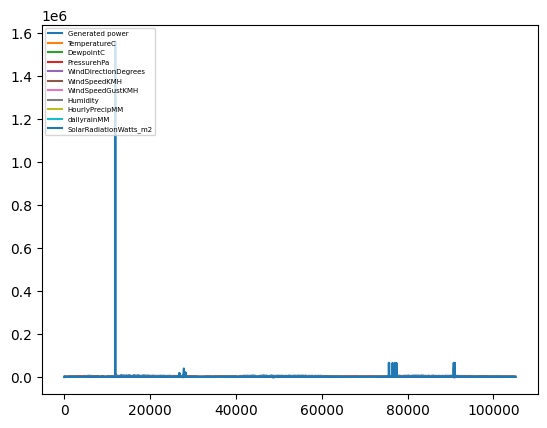

In [3]:
df=df1
df["DateTime"] = df['Hour'].astype(str) +":"+ df["Starting minute (inclussive)"].astype(str)
df=df.drop(columns='Hour')
df=df.drop(columns='Ending minute (exclussive)')
df=df.drop(columns='Starting minute (inclussive)')
# set the initial date to '1989-12-31' and convert the time column to a datetime column
date='1989-12-31'
# convert the datetime strings to datetime objects
datetime_object= pd.to_datetime(date, format='%Y-%m-%d').date()
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%H:%M')
startDate=df['DateTime'][0].time()
firstTime=True
dates=df['DateTime']
for index in df.index:
    if dates[index].time()==startDate:
        datetime_object=datetime_object+ pd.Timedelta(days=1)
        date_entry=df['DateTime'][index].time()
        new_datetime_entry=str(datetime_object)+" "+str(date_entry)
        new_datetime_entry= pd.to_datetime(new_datetime_entry, format='%Y-%m-%d %H:%M')
        df.loc[index,"DateTime"]=new_datetime_entry
    else:
        date_entry=df['DateTime'][index].time()
        new_datetime_entry=str(datetime_object)+" "+str(date_entry)
        new_datetime_entry= pd.to_datetime(new_datetime_entry, format='%Y-%m-%d %H:%M')
        df.loc[index,"DateTime"]=new_datetime_entry
first_column=df.pop("DateTime")
df.insert(0, "DateTime", first_column)
df = df.rename_axis('index')
df.set_index("DateTime",append=True, inplace=True)
df=df.resample('15min',level='DateTime').mean()
df.reset_index(inplace=True)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%H:%M').dt.time
df.head()

df.plot()
plt.legend(loc=2, prop={'size':5})
plt.show()

Call the function to remove outliers

In [4]:
df_no_out=remove_dataset_ouliers(df)
print('Before', len(df), 'After', len(df_no_out), 'Difference',(len(df)-len(df_no_out)))

Before 105120 After 70647 Difference 34473


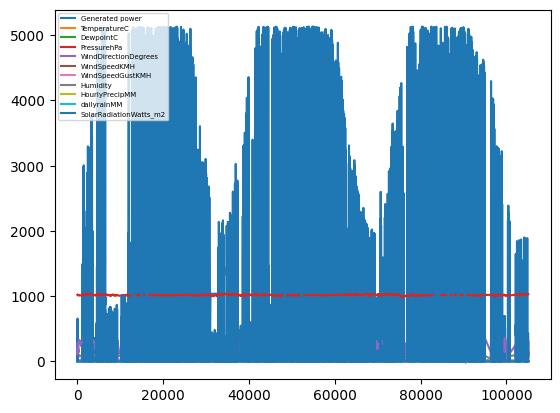

In [5]:
df_no_out.plot()
plt.legend(loc=2, prop={'size':5})
plt.show()

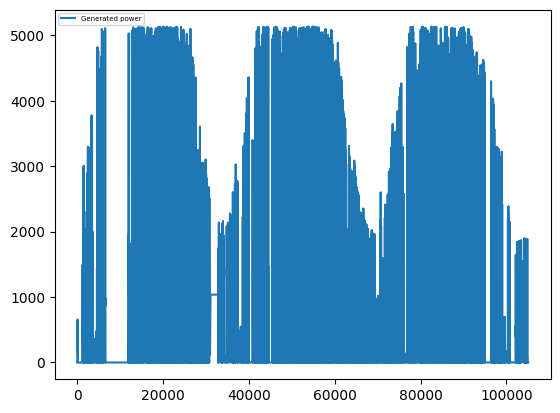

In [6]:
df_no_out['Generated power'].plot()
plt.legend(loc=2, prop={'size':5})
plt.show()

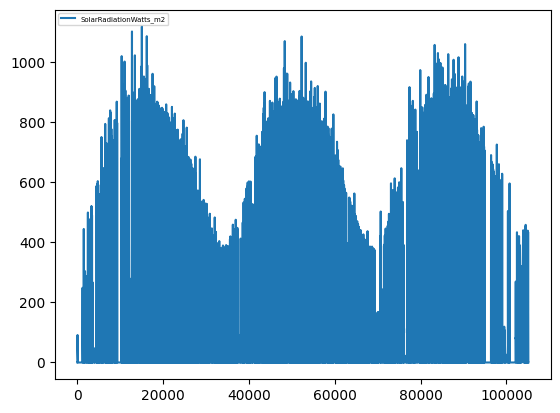

In [7]:
df_no_out['SolarRadiationWatts_m2'].plot()
plt.legend(loc=2, prop={'size':5})
plt.show()

New CSV with Cleaned Data

In [8]:
df_no_out.to_csv('cleanedData.csv',index=False)

Zeros eliminados manualmente desde a linha 15193 à linha 15524 

Nova eliminação desde a linha 2601 à linha 5937 

Com o gerado da eliminação acima => eliminação desde a linha 16133 até 16174

Com o gerado da eliminação acima => eliminação desde a linha 16031 até 17562

Com o gerado da eliminação acima => eliminação desde a linha 15947 até 16024

Com o gerado da eliminação acima => eliminação desde a linha 20961 até 21637

Com o gerado da eliminação acima => eliminação desde a linha 23743 até 24543

Com o gerado da eliminação acima => eliminação desde a linha 17041 até 17530

In [50]:
new_df= pd.read_csv('cleanedData.csv', sep=",",index_col=False)


In [51]:
new_df['Generated power'].plot()
plt.legend(loc=2, prop={'size':5})
plt.show()

In [52]:
new_df['SolarRadiationWatts_m2'].plot()
plt.legend(loc=2, prop={'size':5})
plt.show()

In [49]:
new_df.to_csv('cleanedData.csv',index=False)